<a href="https://colab.research.google.com/github/rmahesh6386/DataScience_Python/blob/main/Titanic_data_visualization_mat_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic data visualization

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")



### Loading dataset

In [ ]:
data = pd.read_csv("/content/train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



#survival - Survival (0 = No; 1 = Yes)
class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
name - Name
sex - Sex
age - Age
sibsp - Number of Siblings/Spouses Aboard
parch - Number of Parents/Children Aboard
ticket - Ticket Number
fare - Passenger Fare
cabin - Cabin
embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

### Data types

In [ ]:
print(data.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


### Proportion of target (Survived)

In [ ]:
data.groupby('Survived')['PassengerId'].count()

Survived
0    549
1    342
Name: PassengerId, dtype: int64

### Visual Exploration

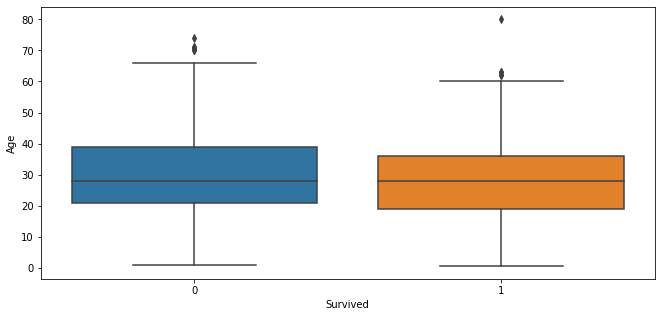

In [ ]:
f, ax = plt.subplots(figsize=(11,5))
sb.boxplot(x='Survived', y="Age",  data=data);

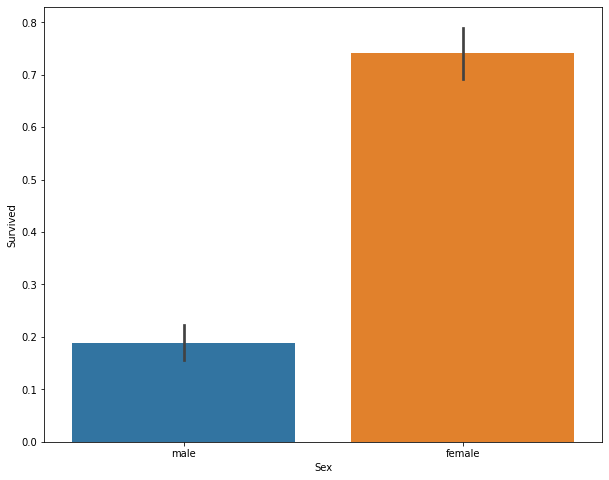

In [ ]:
f, ax = plt.subplots(figsize=(10,8))
sb.barplot(x='Sex', y="Survived",  data=data);

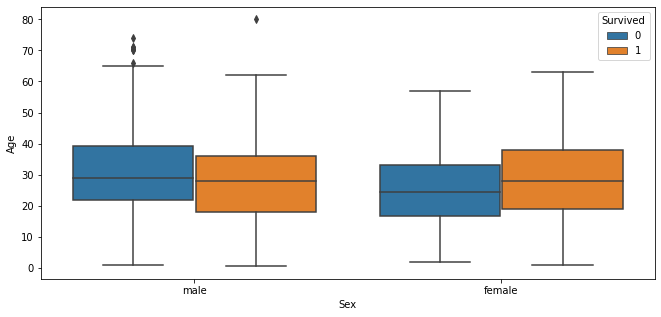

In [ ]:
f, ax = plt.subplots(figsize=(11,5))
sb.boxplot(x="Sex", y="Age", hue="Survived", data=data);

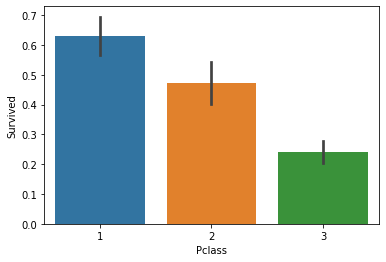

In [ ]:
sb.barplot(x="Pclass", y="Survived", data=data);

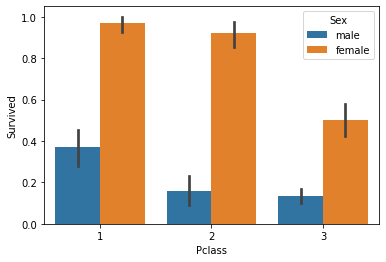

In [ ]:
sb.barplot(x="Pclass", y="Survived",hue="Sex", data=data);

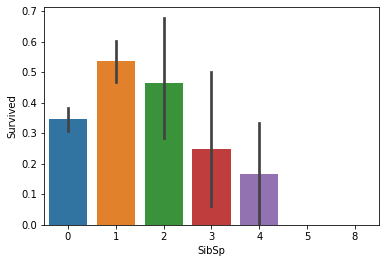

In [ ]:
sb.barplot(x="SibSp", y="Survived", data=data);

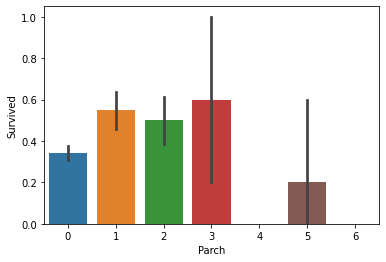

In [ ]:
sb.barplot(x="Parch", y="Survived", data=data);

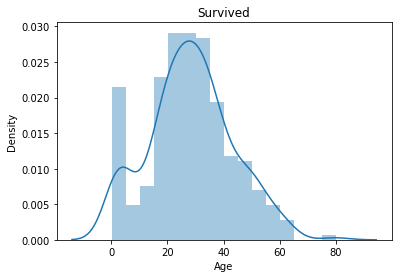

In [ ]:
survived = data.loc[data['Survived']==1,"Age"].dropna()
sb.distplot(survived)
plt.title("Survived");

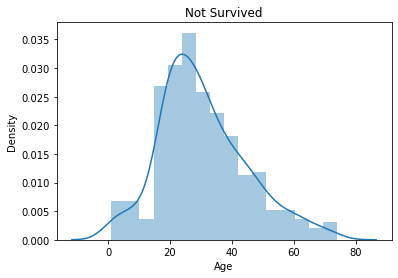

In [ ]:
not_survived = data.loc[data['Survived']==0,"Age"].dropna()
sb.distplot(not_survived)
plt.title("Not Survived");

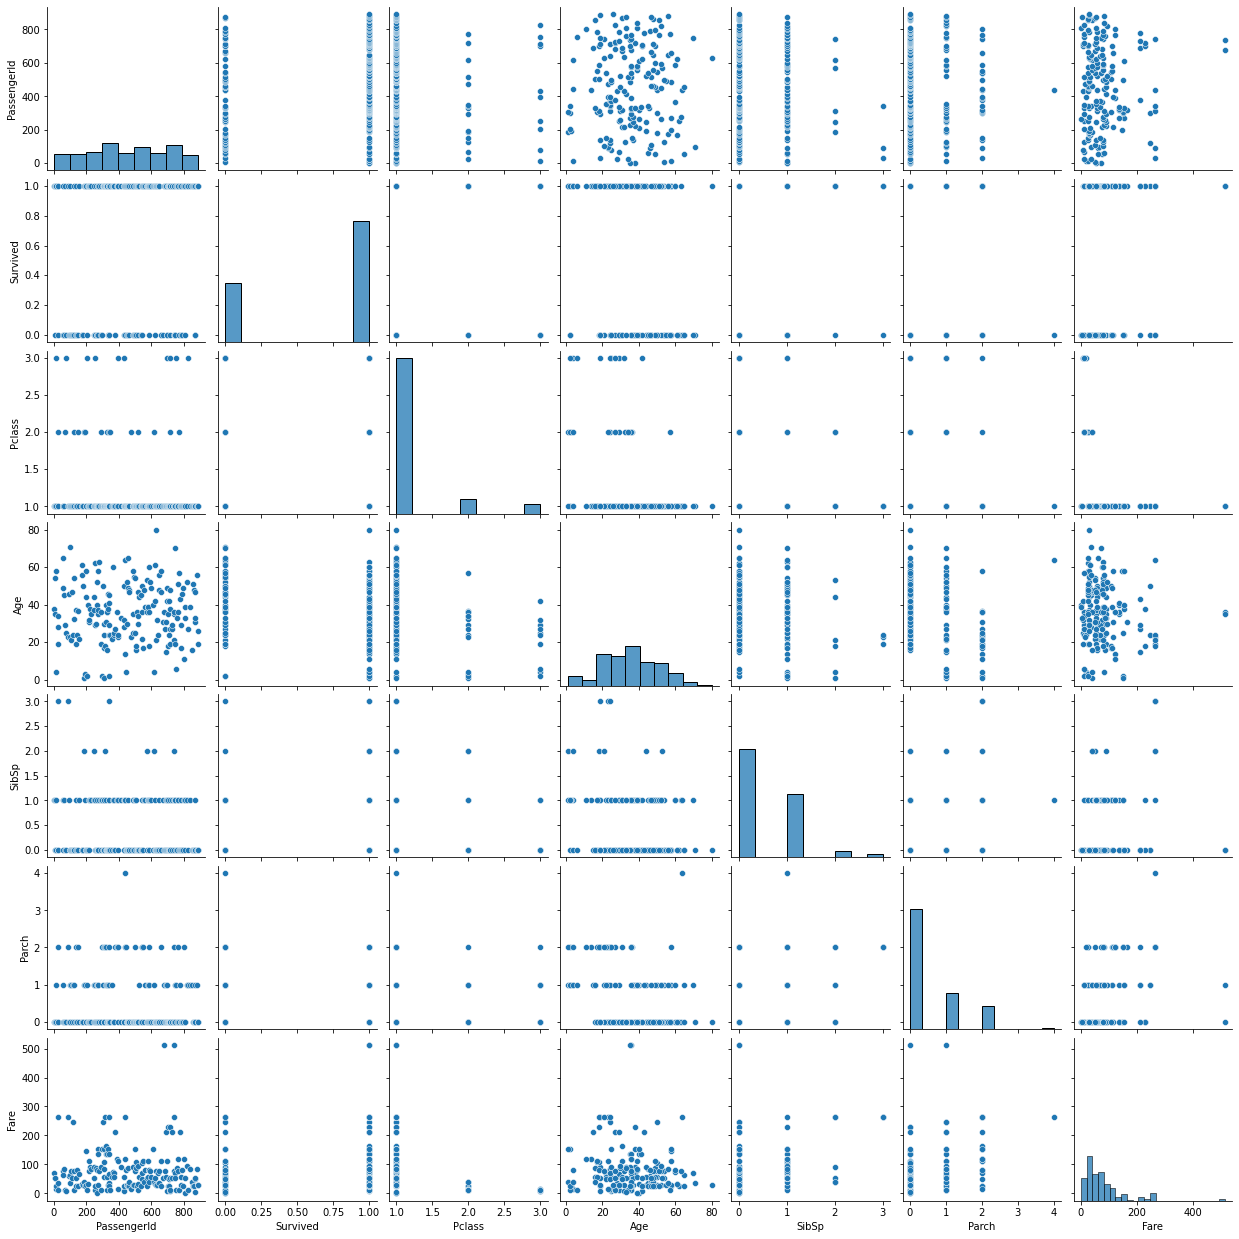

In [ ]:
sb.pairplot(data.dropna());

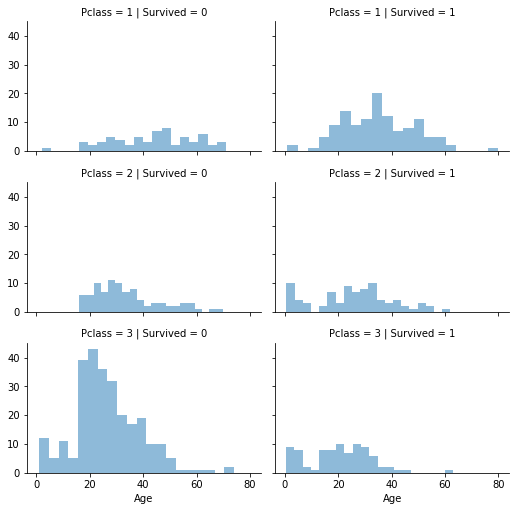

In [ ]:
# Pclass vs Survive
grid = sb.FacetGrid(data, col='Survived', row='Pclass', size=2.4, aspect=1.5)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

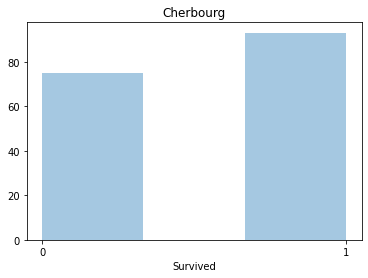

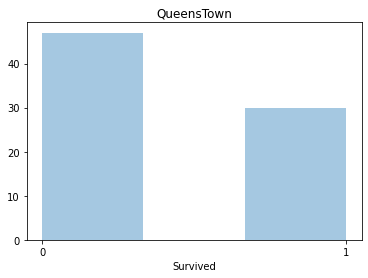

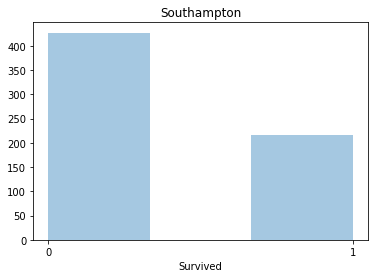

In [ ]:
plt.title("Cherbourg")
sb.distplot(a=data[data['Embarked']=='C']['Survived'],bins=3,kde=False)
plt.xticks([0,1])
plt.show()

plt.title("QueensTown")
sb.distplot(a=data[data['Embarked']=='Q']['Survived'],bins=3,kde=False)
plt.xticks([0,1])
plt.show()

plt.title("Southampton")
sb.distplot(a=data[data['Embarked']=='S']['Survived'],bins=3,kde=False)
plt.xticks([0,1])
plt.show()

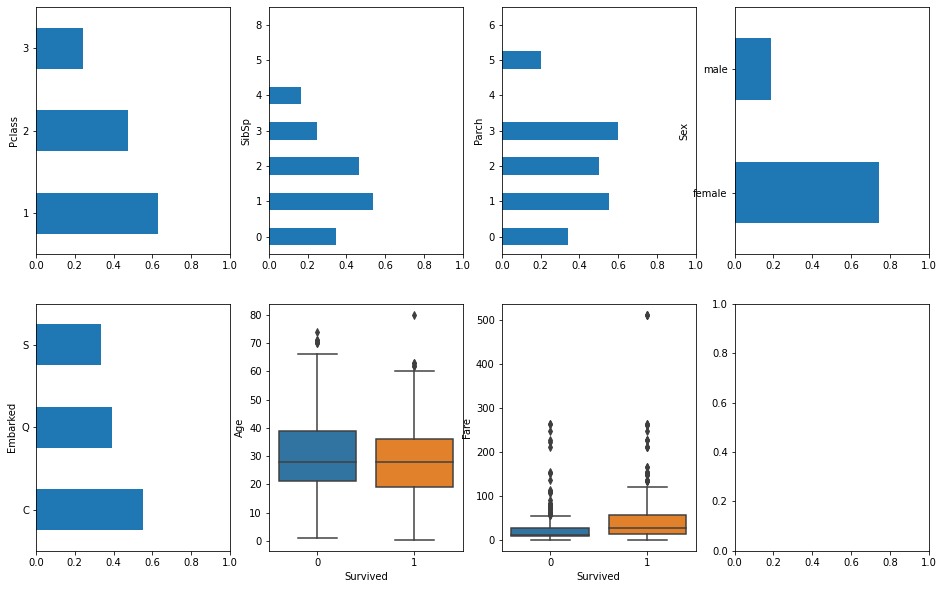

In [22]:
figbi, axesbi = plt.subplots(2, 4, figsize=(16, 10))
data.groupby('Pclass')['Survived'].mean().plot(kind='barh',ax=axesbi[0,0],xlim=[0,1])
data.groupby('SibSp')['Survived'].mean().plot(kind='barh',ax=axesbi[0,1],xlim=[0,1])
data.groupby('Parch')['Survived'].mean().plot(kind='barh',ax=axesbi[0,2],xlim=[0,1])
data.groupby('Sex')['Survived'].mean().plot(kind='barh',ax=axesbi[0,3],xlim=[0,1])
data.groupby('Embarked')['Survived'].mean().plot(kind='barh',ax=axesbi[1,0],xlim=[0,1])
sb.boxplot(x="Survived", y="Age", data=data,ax=axesbi[1,1])
sb.boxplot(x="Survived", y="Fare", data=data,ax=axesbi[1,2])
plt.savefig("img.png")